In [30]:
import os

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from collections import Counter
import re

from lmfit import Model

import time

In [16]:
directory = os.getcwd()

folder = 'processed'
filename = 'EditorGUI'

In [13]:
folder = '/corpus/mergers'
filename = 'unity_code'

In [2]:
directory = os.getcwd()

folder = '/corpus/mergers'
filename = 'songs'

In [32]:
with open(f'{directory}/{folder}/{filename}.txt', 'r') as file:
    lines = file.read()

symbols = ['\'', '\n', '(', ')', '?', ',', ';', ':', '.', '[', ']', '{', '}']    

for symbol in symbols:
    lines = lines.replace(f'{symbol}', ' ')

lines = re.sub('\s+', ' ', lines)    

text = lines.split(' ')

unique = Counter(text)

vocab = pd.DataFrame.from_dict(unique, orient='index').reset_index()#, columns=['word', 'freq'])\
vocab = vocab.rename(columns={"index": "word", 0: "freq"})
vocab = vocab.sort_values(by='freq', ascending=False, ignore_index=True)
vocab.index = vocab.index + 1
vocab['norm_freq'] = vocab['freq'] / vocab['freq'].sum()
vocab

,word,freq,norm_freq
1,I,38787,0.043958
2,the,28698,0.032524
3,you,21672,0.024561
4,to,16820,0.019062
5,a,15349,0.017395
...,...,...,...
41212,"""holla""",1,0.000001
41213,re-meet,1,0.000001
41214,"face""",1,0.000001
41215,tabernacle,1,0.000001


In [142]:
N_1 = len(vocab[vocab['freq'] == 1])
N_2 = len(vocab[vocab['freq'] == 2])

N_1
N_2
vocab['freq'].sum()

882367

In [112]:
start = 50
end = 5000

slope, intercept, r, p, se = stats.linregress(x=np.log(vocab.index[start:end]), y=np.log(vocab['freq'][start:end]))

slope, intercept, r

(-1.2029006878439, 12.7320538251718, -0.9995603908679912)

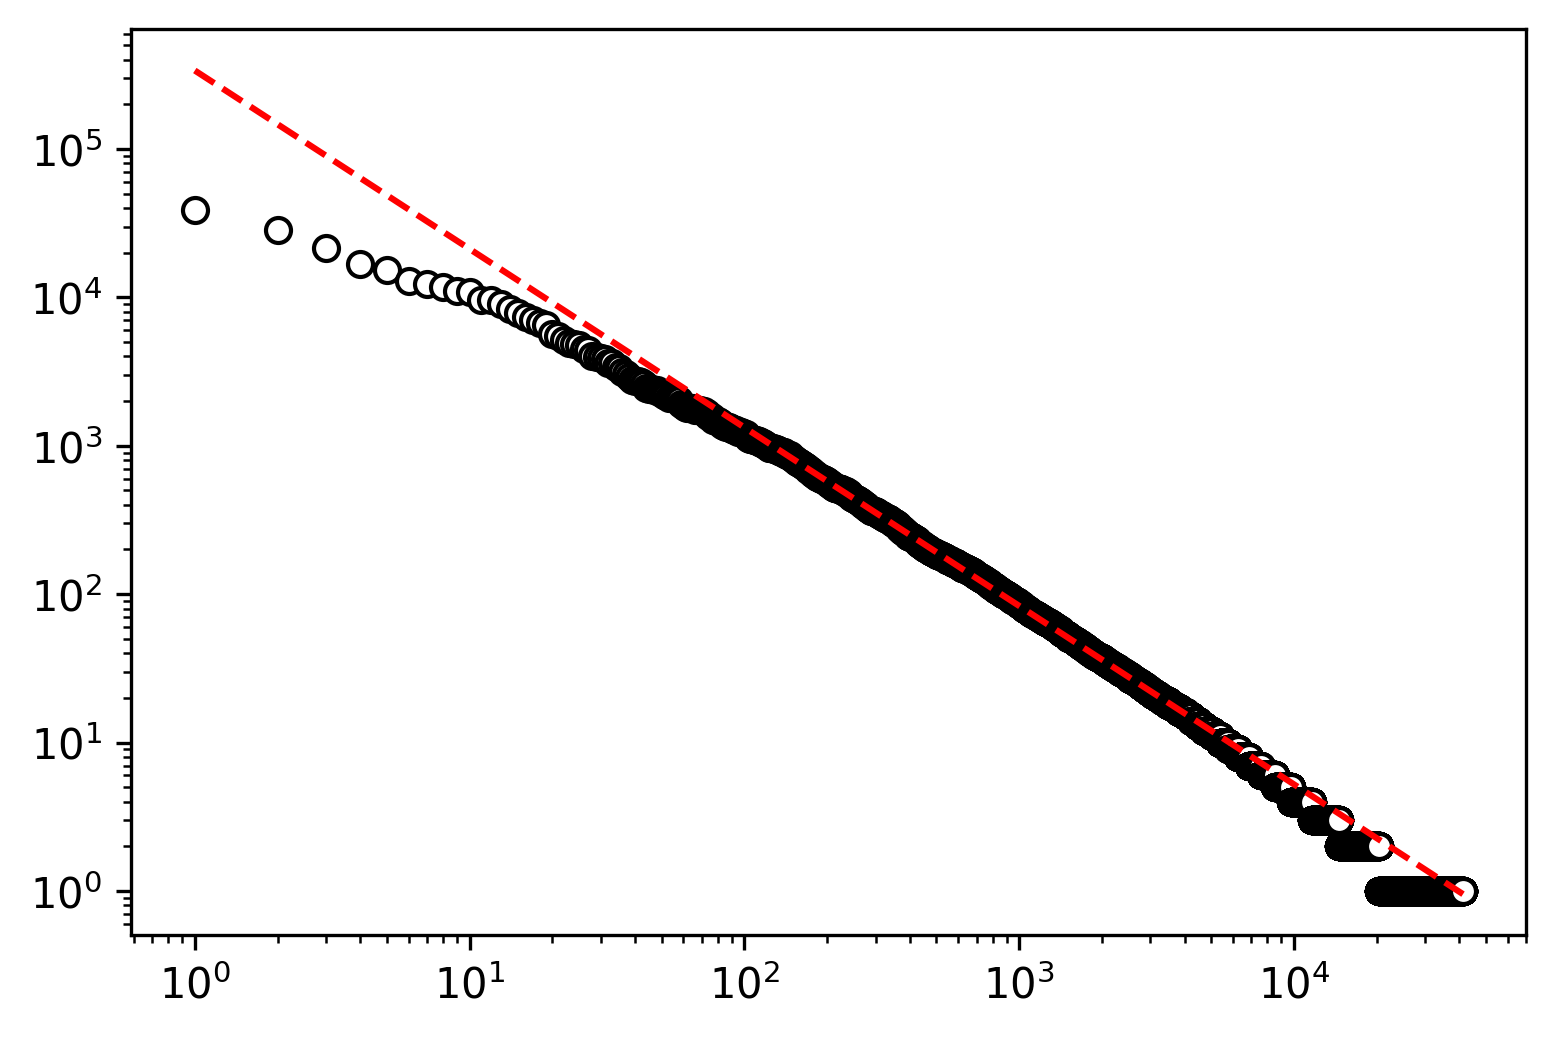

In [113]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log')

ax.scatter(vocab.index, vocab['freq'], edgecolor='black', facecolor='white')
ax.plot(vocab.index.to_numpy(), np.e**intercept*vocab.index.to_numpy()**slope, '--', color='red')

# ax.plot(np.asarray(vocab.index), np.asarray(zm_result.best_fit), '-.', color='blue', label='Zipf-Mandelbrot')

In [17]:
with open(f'{directory}/{folder}/{filename}.txt', 'r') as file:
    lines = file.read()

text = lines.split(' ')

print(len(text))

# start = time.perf_counter()

# unique = {}
# for word in text:
#     if word in unique:
#         unique[word] += 1
#     else:
#         unique[word] = 1

# end = time.perf_counter()
# print(f'elapsed time: {end - start:.4}')

unique = Counter(text)
        
vocab = pd.DataFrame.from_dict(unique, orient='index').reset_index()#, columns=['word', 'freq'])\
vocab = vocab.rename(columns={"index": "word", 0: "freq"})
vocab = vocab.sort_values(by='freq', ascending=False, ignore_index=True)
vocab.index = vocab.index + 1
vocab['norm_freq'] = vocab['freq'] / vocab['freq'].sum()
vocab

56815


,word,freq,norm_freq
1,.,4862,0.085576
2,(,4799,0.084467
3,;,3885,0.068380
4,=,2174,0.038265
5,{,1741,0.030643
...,...,...,...
2531,CanHaveKeyboardFocus,1,0.000018
2532,GetHyperlinksRect,1,0.000018
2533,PlayerSettings,1,0.000018
2534,GetVirtualTexturingSupportEnabled,1,0.000018


In [15]:
print(vocab.head(20))
print(vocab[vocab['freq'] == 1])

          word  freq  norm_freq
1            .  4862   0.085576
2            (  4799   0.084467
3            ;  3885   0.068380
4            =  2174   0.038265
5            {  1741   0.030643
6     position  1398   0.024606
7       static  1032   0.018164
8        label  1017   0.017900
9            [   859   0.015119
10        Rect   822   0.014468
11      return   757   0.013324
12       value   731   0.012866
13          if   671   0.011810
14         int   643   0.011317
15           "   628   0.011053
16      public   628   0.011053
17       style   612   0.010772
18     options   582   0.010244
19          id   519   0.009135
20  GUIContent   517   0.009100
                                   word  freq  norm_freq
1795                            ToArray     1   0.000018
1796                       miniPullDown     1   0.000018
1797                 olorUsageAttribute     1   0.000018
1798                        RGBMEncoded     1   0.000018
1799                 managedReferenceId    

In [12]:
print(len(vocab[vocab['freq'] == 2])/len(vocab[vocab['freq'] == 1]))
print(len(vocab[vocab['freq'] == 1])/vocab['freq'].sum())
print(len(vocab[vocab['word'] == 'String'])/len(vocab))

0.631578947368421
0.013042330370500748
0.0003944773175542406


In [9]:
print(vocab[vocab['word'] == 'String'])

        word  freq  norm_freq
1201  String     3   0.000053


In [4]:
with open(f'{directory}/{folder}/unity_code.txt', 'r') as file:
    lines = file.read()

text = lines.split(' ')

print(len(text))

unique = {}
for word in text:
    if word in unique:
        unique[word] += 1
    else:
        unique[word] = 1
        
vocab = pd.DataFrame.from_dict(unique, orient='index').reset_index()#, columns=['word', 'freq'])\
vocab = vocab.rename(columns={"index": "word", 0: "freq"})
vocab = vocab.sort_values(by='freq', ascending=False, ignore_index=True)
vocab.index = vocab.index + 1
vocab['norm_freq'] = vocab['freq'] / vocab['freq'].sum()
vocab

1630090


,word,freq,norm_freq
1,.,146277,8.973554e-02
2,(,145567,8.929998e-02
3,;,134720,8.264574e-02
4,=,64696,3.968861e-02
5,{,53587,3.287365e-02
...,...,...,...
63452,MeTimeBlockRight,1,6.134631e-07
63453,SetHDRCubemapEncodingQuality,1,6.134631e-07
63454,GetHDRCubemapEncodingQuality,1,6.134631e-07
63455,SetLightmapEncodingQuality,1,6.134631e-07


In [120]:
print(vocab.head(20))

    word   freq  norm_freq
1      I  38787   0.043958
2    the  28698   0.032524
3    you  21672   0.024561
4     to  16820   0.019062
5      a  15349   0.017395
6     it  12825   0.014535
7      s  12339   0.013984
8     me  11684   0.013242
9      t  11109   0.012590
10   and  10935   0.012393
11    my   9668   0.010957
12    in   9574   0.010850
13     m   9063   0.010271
14    of   8370   0.009486
15  that   7831   0.008875
16    on   7355   0.008336
17  your   7008   0.007942
18   You   6677   0.007567
19  like   6533   0.007404
20    is   5653   0.006407


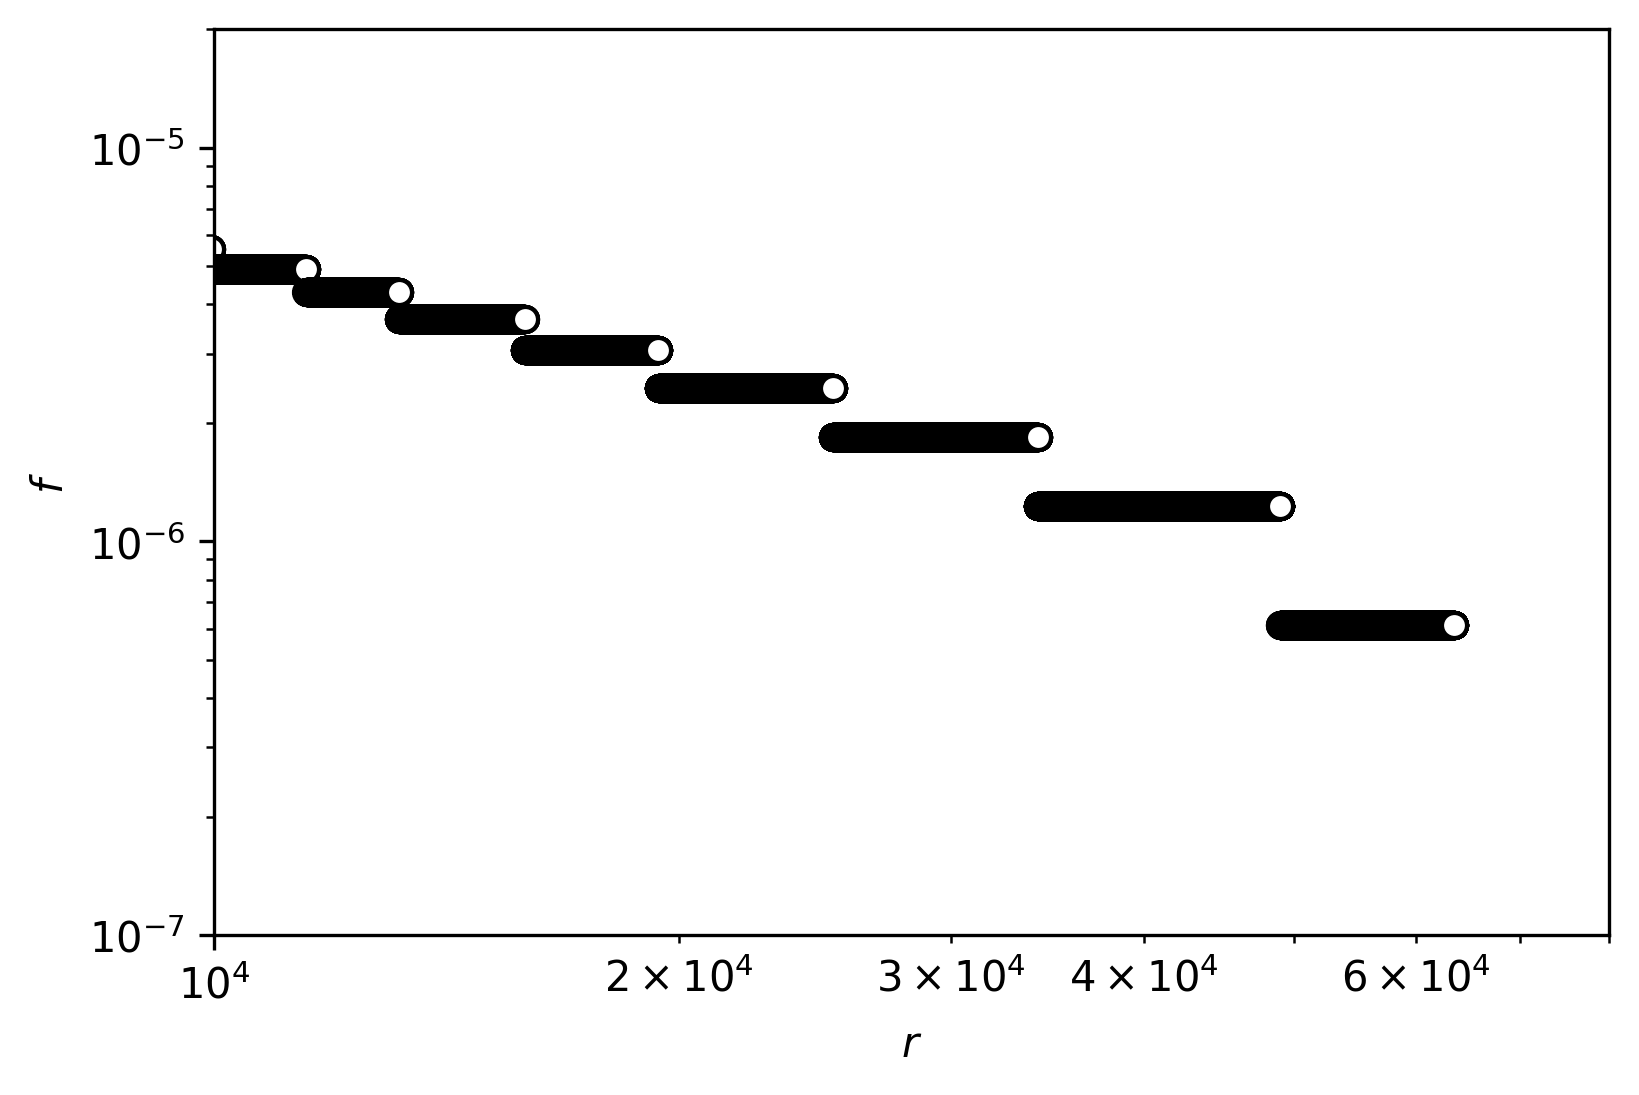

In [230]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log', xlabel=r'$r$', ylabel=r'$f$', xlim=(10000, 80000), ylim=(1e-7, 2e-5))

ax.scatter(vocab.index, vocab['norm_freq'], facecolor='white', edgecolor='black')

plt.savefig(f'{directory}/figures/unity_code_nonzipf_regime_high_ranks.png')

In [35]:
def zipf_mandelbrot(x, A, alpha, r_0):
    return A / (r_0 + x)**alpha

def montemurro(x, l, m, q):
    denominator = 1 - l/m + l/m * np.exp((q - 1) * m * x)
    return 1 / np.power(denominator, (1/(q-1)))

In [36]:
def qexp_dist(x, l, q, Z):
    return 1/Z * np.power(1 - l*(q - 1)*x, 1/(q-1))

In [121]:
##### zm_model = Model(zipf_mandelbrot)

zm_params = zm_model.make_params(A=1.5, alpha=2, r_0=170)

zm_result = zm_model.fit(x=vocab.index, data=vocab['freq'], params=zm_params)

ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [86]:
print(zm_result.fit_report())

[[Model]]
    Model(zipf_mandelbrot)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 41216
    # variables        = 3
    chi-square         = 5.2683e+09
    reduced chi-square = 127830.256
    Akaike info crit   = 484639.627
    Bayesian info crit = 484665.507
##  Warning: uncertainties could not be estimated:
    A:      at initial value
    alpha:  at initial value
    r_0:    at initial value
[[Variables]]
    A:      20.0000000 (init = 20)
    alpha:  9.00000000 (init = 9)
    r_0:    4.50000000 (init = 4.5)


In [78]:
mm_model = Model(montemurro)

mm_params = mm_model.make_params(l=.1, m=1e-5, q=5.3)

mm_result = mm_model.fit(x=vocab.index, data=vocab['norm_freq'], params=mm_params)

In [79]:
print(mm_result.fit_report())

[[Model]]
    Model(montemurro)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 63456
    # variables        = 3
    chi-square         = 0.00335459
    reduced chi-square = 5.2867e-08
    Akaike info crit   = -1063232.81
    Bayesian info crit = -1063205.64
[[Variables]]
    l:  7.92372630 +/- 0.03103198 (0.39%) (init = 0.1)
    m: -2.6659e-06 +/- 5.2038e-06 (195.20%) (init = 1e-05)
    q:  2.03505217 +/- 0.00169575 (0.08%) (init = 5.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(l, q) =  0.895
    C(l, m) = -0.108


In [127]:
start = 50
end = 1000

slope, intercept, r, p, se = stats.linregress(np.log(vocab.index[start:end]), np.log(vocab['norm_freq'][start:end]))

print(slope, np.e**intercept, r)

-1.1412502608241768 0.26425592648734186 -0.9990431951885583


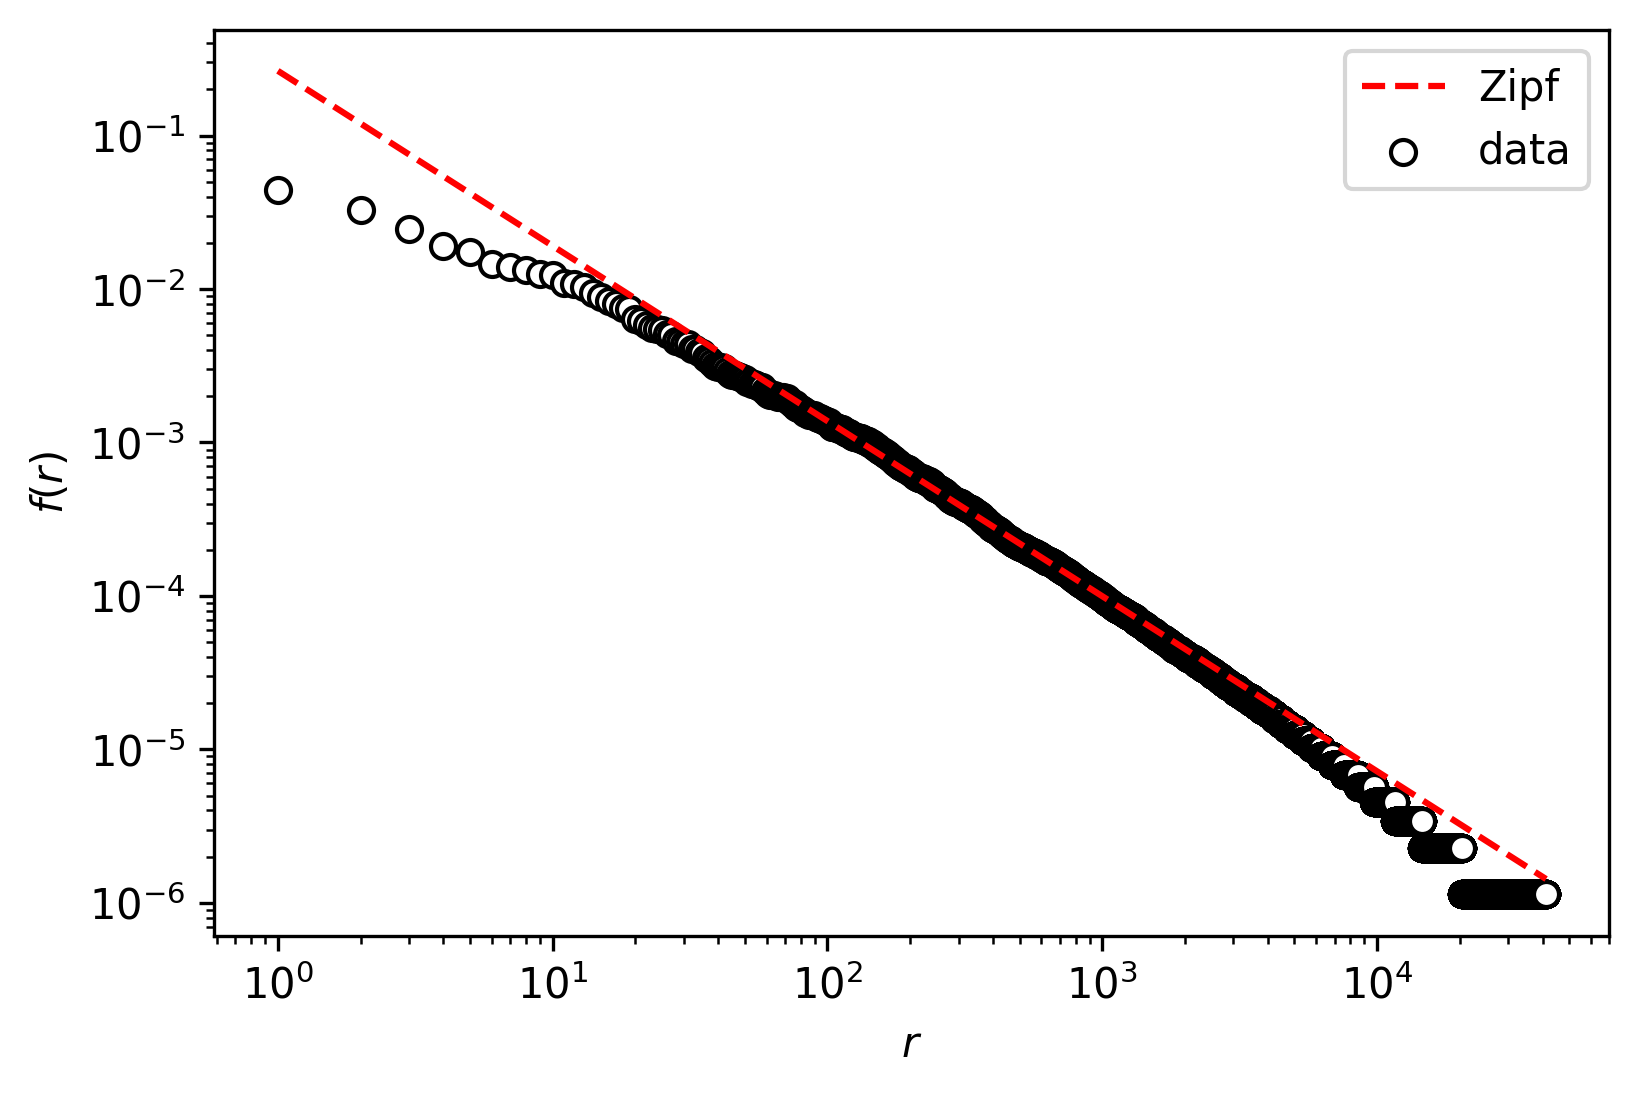

In [128]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log', xlabel=r'$r$', ylabel=r'$f(r)$')#, title=f'{filename}')

# ax.title('filename')

ax.scatter(vocab.index, vocab['norm_freq'], edgecolor='black', facecolor='white', label='data')
ax.plot(vocab.index.to_numpy(), np.e**intercept * vocab.index.to_numpy()**slope, '--', color='red', label='Zipf')
#ax.plot(np.asarray(vocab.index), np.asarray(zm_result.best_fit), '-.', color='blue', label='Zipf-Mandelbrot')
#ax.plot(np.asarray(vocab.index), np.asarray(mm_result.best_fit), '-.', color='green', label='Montemurro')

ax.legend()

plt.savefig(f'{directory}/figures/{filename}_zipfs-law.png')

In [129]:
probs, bins = np.histogram(vocab['norm_freq'], bins='fd')

pdf = pd.DataFrame()
pdf['bins'] = bins[:-1]
pdf['probs'] = probs / len(vocab['norm_freq'])

pdf = pdf[pdf['probs'] != 0].reset_index(drop=True)
pdf.index = pdf.index + 1
pdf

,bins,probs
1,0.000001,0.504634
2,0.000002,0.141013
3,0.000003,0.072351
4,0.000004,0.045031
5,0.000006,0.029479
...,...,...
559,0.017395,0.000024
560,0.019062,0.000024
561,0.024561,0.000024
562,0.032524,0.000024


In [130]:
qe_model = Model(qexp_dist)

qe_params = qe_model.make_params(l=0.5, q=.1, Z=pdf['probs'].sum())#, r_0=2.4)

qe_result = qe_model.fit(x=pdf['bins'], data=pdf['probs'], params=qe_params, nan_policy='omit', )

print(qe_result.fit_report())

NameError: name 'qexp_dist' is not defined

In [140]:
start_rank = 5
end_rank = 250

slope, intercept, r, p, se = stats.linregress(x=np.log(pdf['bins'][start_rank:end_rank]), y=np.log(pdf['probs'][start_rank:end_rank]))
# slope, intercept, r, p, se = stats.linregress(x=np.log(pdf['bins']), y=np.log(pdf['probs']))

print(slope, np.e**intercept, r)

-1.734216761874157 2.573509682637228e-11 -0.9631305059581029


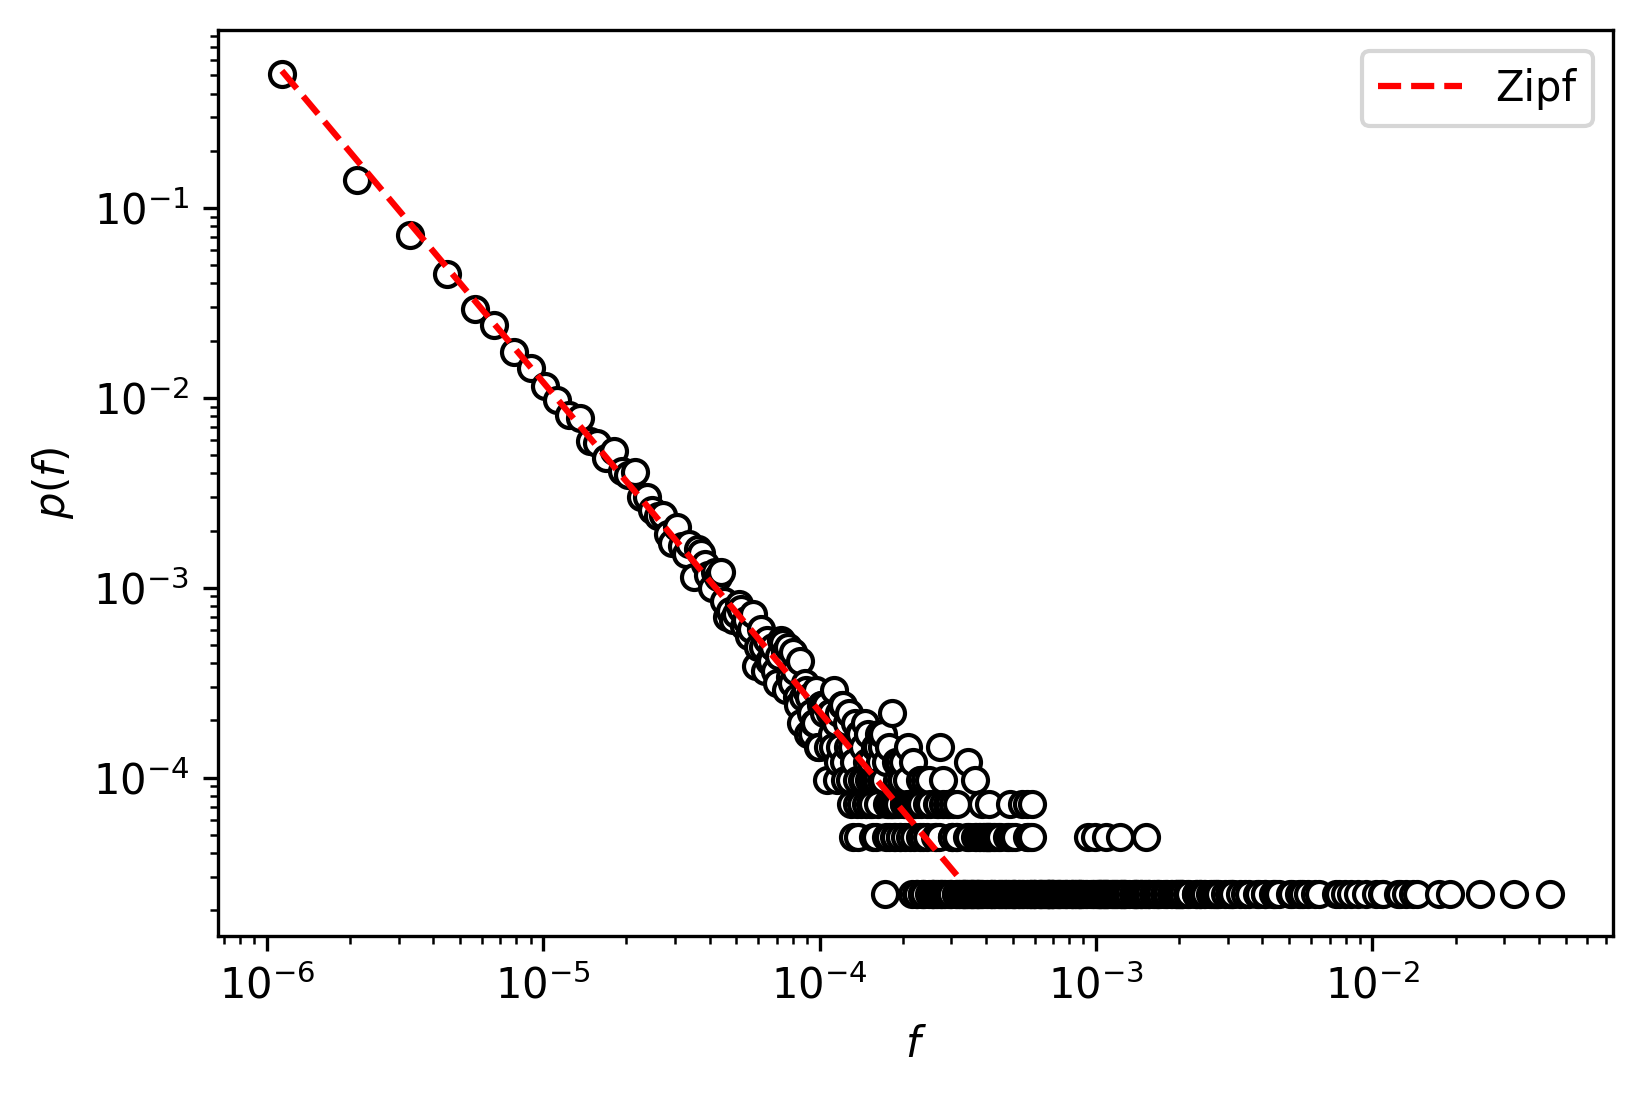

In [141]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log', xlabel=r'$f$', ylabel=r'$p(f)$')

ax.scatter(pdf['bins'], pdf['probs'], edgecolor='black', facecolor='white')
ax.plot(pdf['bins'][:end_rank].to_numpy(), np.e**intercept * pdf['bins'][:end_rank].to_numpy()**slope, '--', color='red', label='Zipf')

ax.legend()

plt.savefig(f'{directory}/figures/{filename}_pdf.png')

In [133]:
pdf['cdf'] = np.cumsum(pdf['probs'])
pdf['ccdf'] = 1 - pdf['cdf']

pdf

,bins,probs,cdf,ccdf
1,0.000001,0.504634,0.504634,4.953659e-01
2,0.000002,0.141013,0.645647,3.543527e-01
3,0.000003,0.072351,0.717998,2.820021e-01
4,0.000004,0.045031,0.763029,2.369711e-01
5,0.000006,0.029479,0.792508,2.074922e-01
...,...,...,...,...
559,0.017395,0.000024,0.999903,9.704969e-05
560,0.019062,0.000024,0.999927,7.278727e-05
561,0.024561,0.000024,0.999951,4.852484e-05
562,0.032524,0.000024,0.999976,2.426242e-05


In [134]:
slope, intercept, r, p, se = stats.linregress(x=np.log(pdf['bins'][5:end_rank]), y=np.log(pdf['ccdf'][5:end_rank]))

print(slope, np.e**intercept, r)

-0.8214067980601555 1.193786706102312e-05 -0.9990735009986742


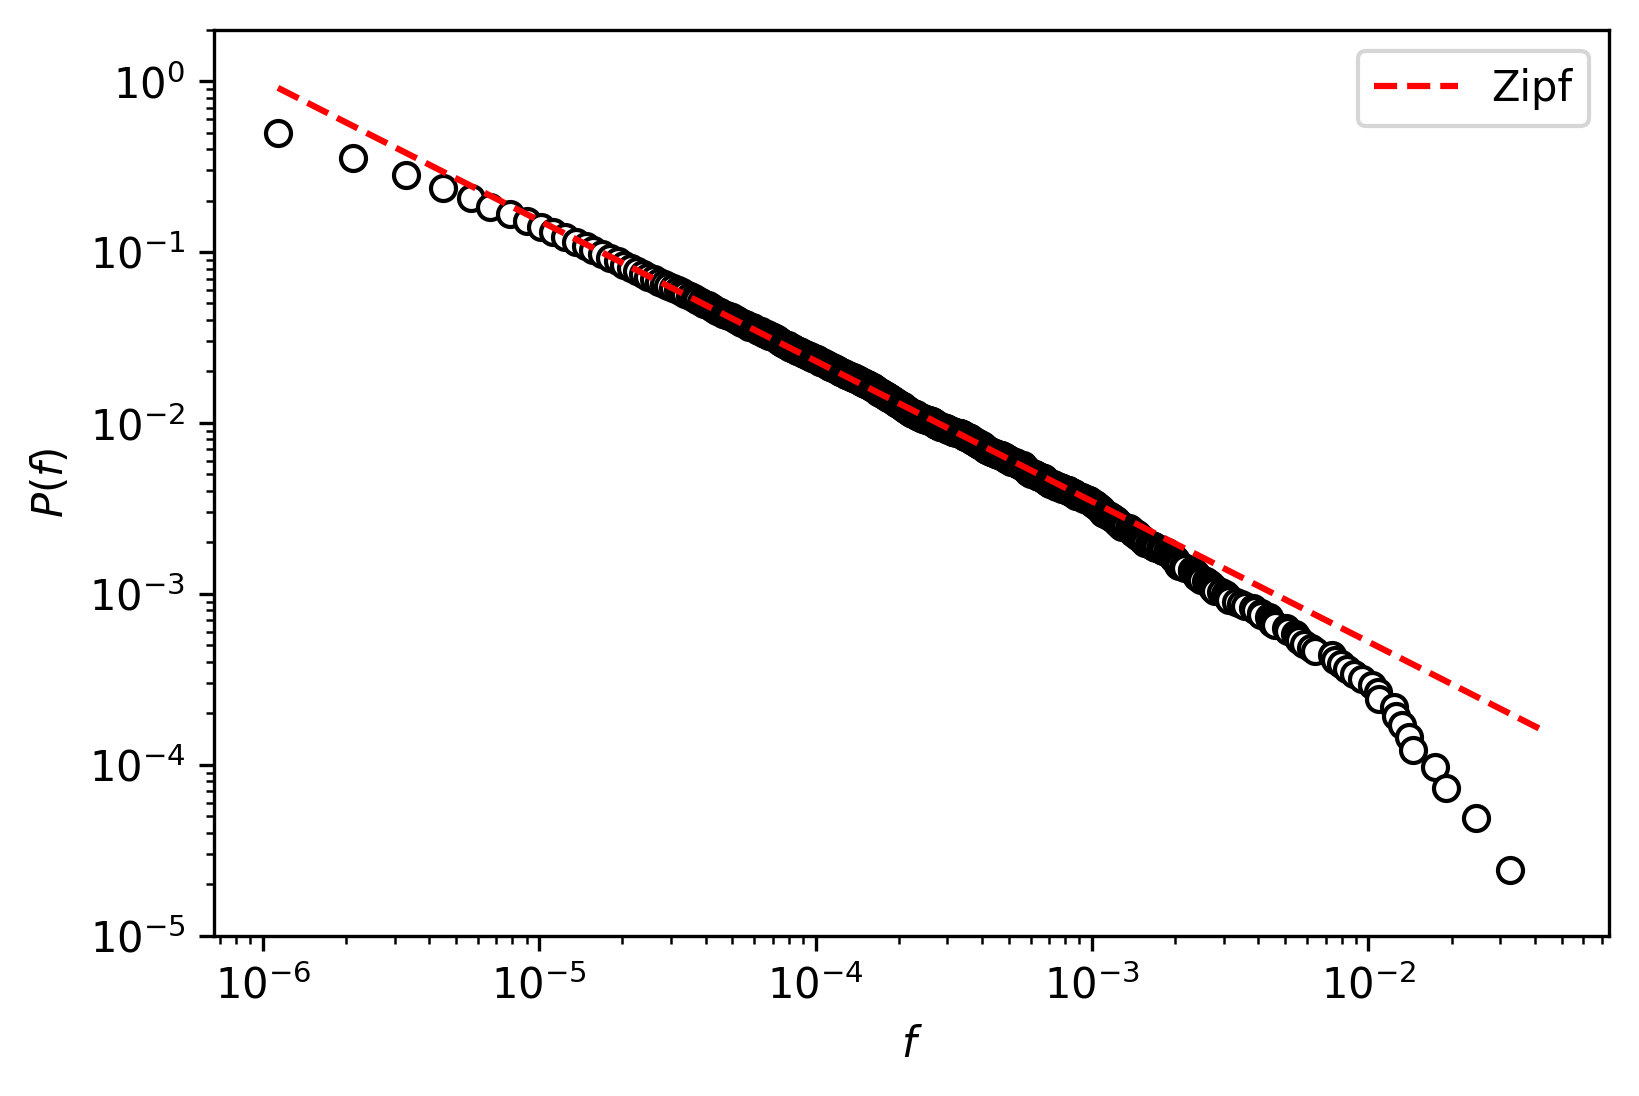

In [135]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log', xlabel=r'$f$', ylabel=r'$P(f)$', ylim={1e-5, 2})

ax.scatter(pdf['bins'], pdf['ccdf'], edgecolor='black', facecolor='white')
ax.plot(pdf['bins'].to_numpy(), np.e**intercept * pdf['bins'].to_numpy()**slope, '--', color='red', label='Zipf')

ax.legend()

plt.savefig(f'{directory}/figures/{filename}_ccdf.png')